## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


## Load and Display the Dataset

In [13]:
url = r'C:\Users\Mohamed_Sameer\Downloads\archive (1)\WineQT.csv'
wine_data = pd.read_csv(url)

print("First few rows of the dataset:")
print(wine_data.head())

print("\nDataset Info:")
wine_data.info()
print("\nSummary Statistics:")
wine_data.describe()


First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1  

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

## Visualize Distribution of Wine Quality

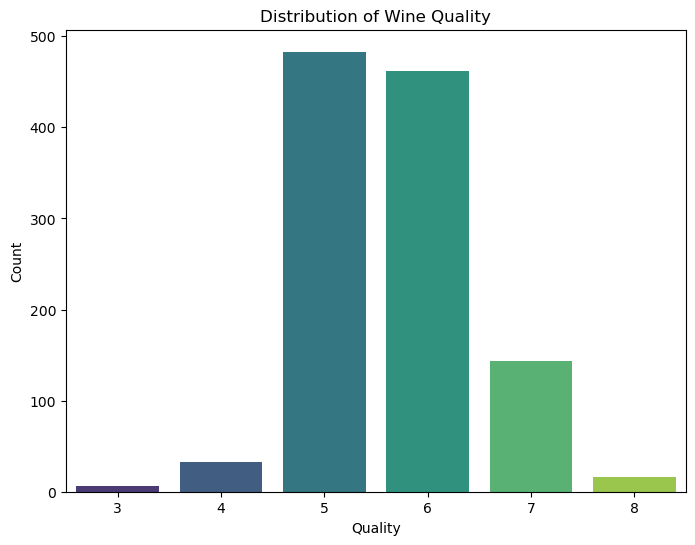

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


## Check for Missing Values

In [17]:
missing_values = wine_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)



Missing Values in Each Column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


## Preprocessing

In [19]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train and Evaluate Random Forest Classifier

In [21]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Classifier Evaluation:")
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))



Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229

[[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 69  5  1]
 [ 0  0 11 15  0]
 [ 0  0  2  0  0]]


C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Train and Evaluate Stochastic Gradient Descent (SGD) Classifier

In [23]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_scaled, y_train)
sgd_pred = sgd_model.predict(X_test_scaled)

print("\nSGD Classifier Evaluation:")
print(classification_report(y_test, sgd_pred))
print(confusion_matrix(y_test, sgd_pred))



SGD Classifier Evaluation:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.39      0.34       229
weighted avg       0.61      0.59      0.57       229

[[ 0  2  4  0  0]
 [ 0 75 12  8  1]
 [ 0 31 39 29  0]
 [ 0  2  4 20  0]
 [ 0  0  0  2  0]]


C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##  Train and Evaluate Support Vector Classifier (SVC)

In [25]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)
svc_pred = svc_model.predict(X_test_scaled)

print("\nSVC Classifier Evaluation:")
print(classification_report(y_test, svc_pred))
print(confusion_matrix(y_test, svc_pred))



SVC Classifier Evaluation:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.61      0.70      0.65        99
           7       0.69      0.35      0.46        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.36      0.37       229
weighted avg       0.64      0.66      0.64       229

[[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 27 69  3  0]
 [ 0  1 16  9  0]
 [ 0  0  1  1  0]]


C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


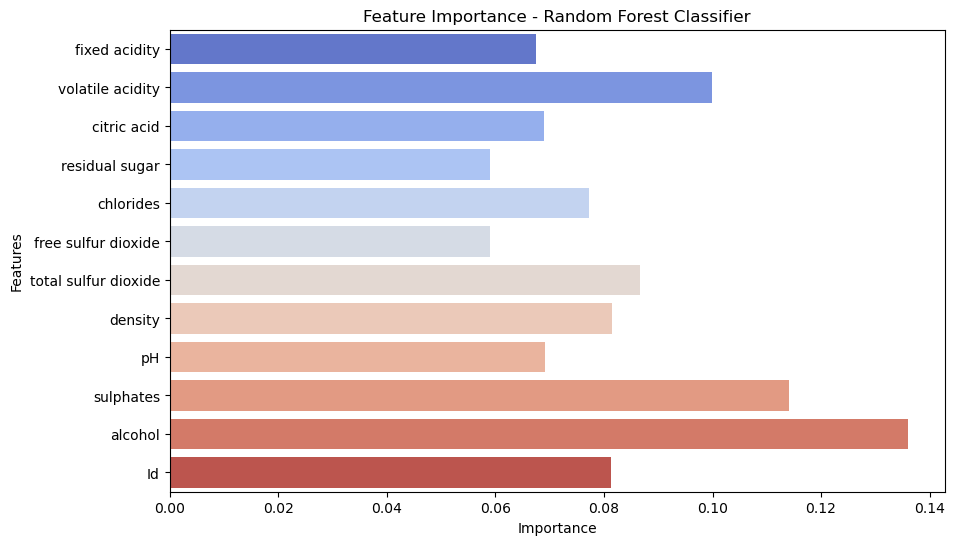

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns, palette='coolwarm')
plt.title('Feature Importance - Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


##  Data Visualization

C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

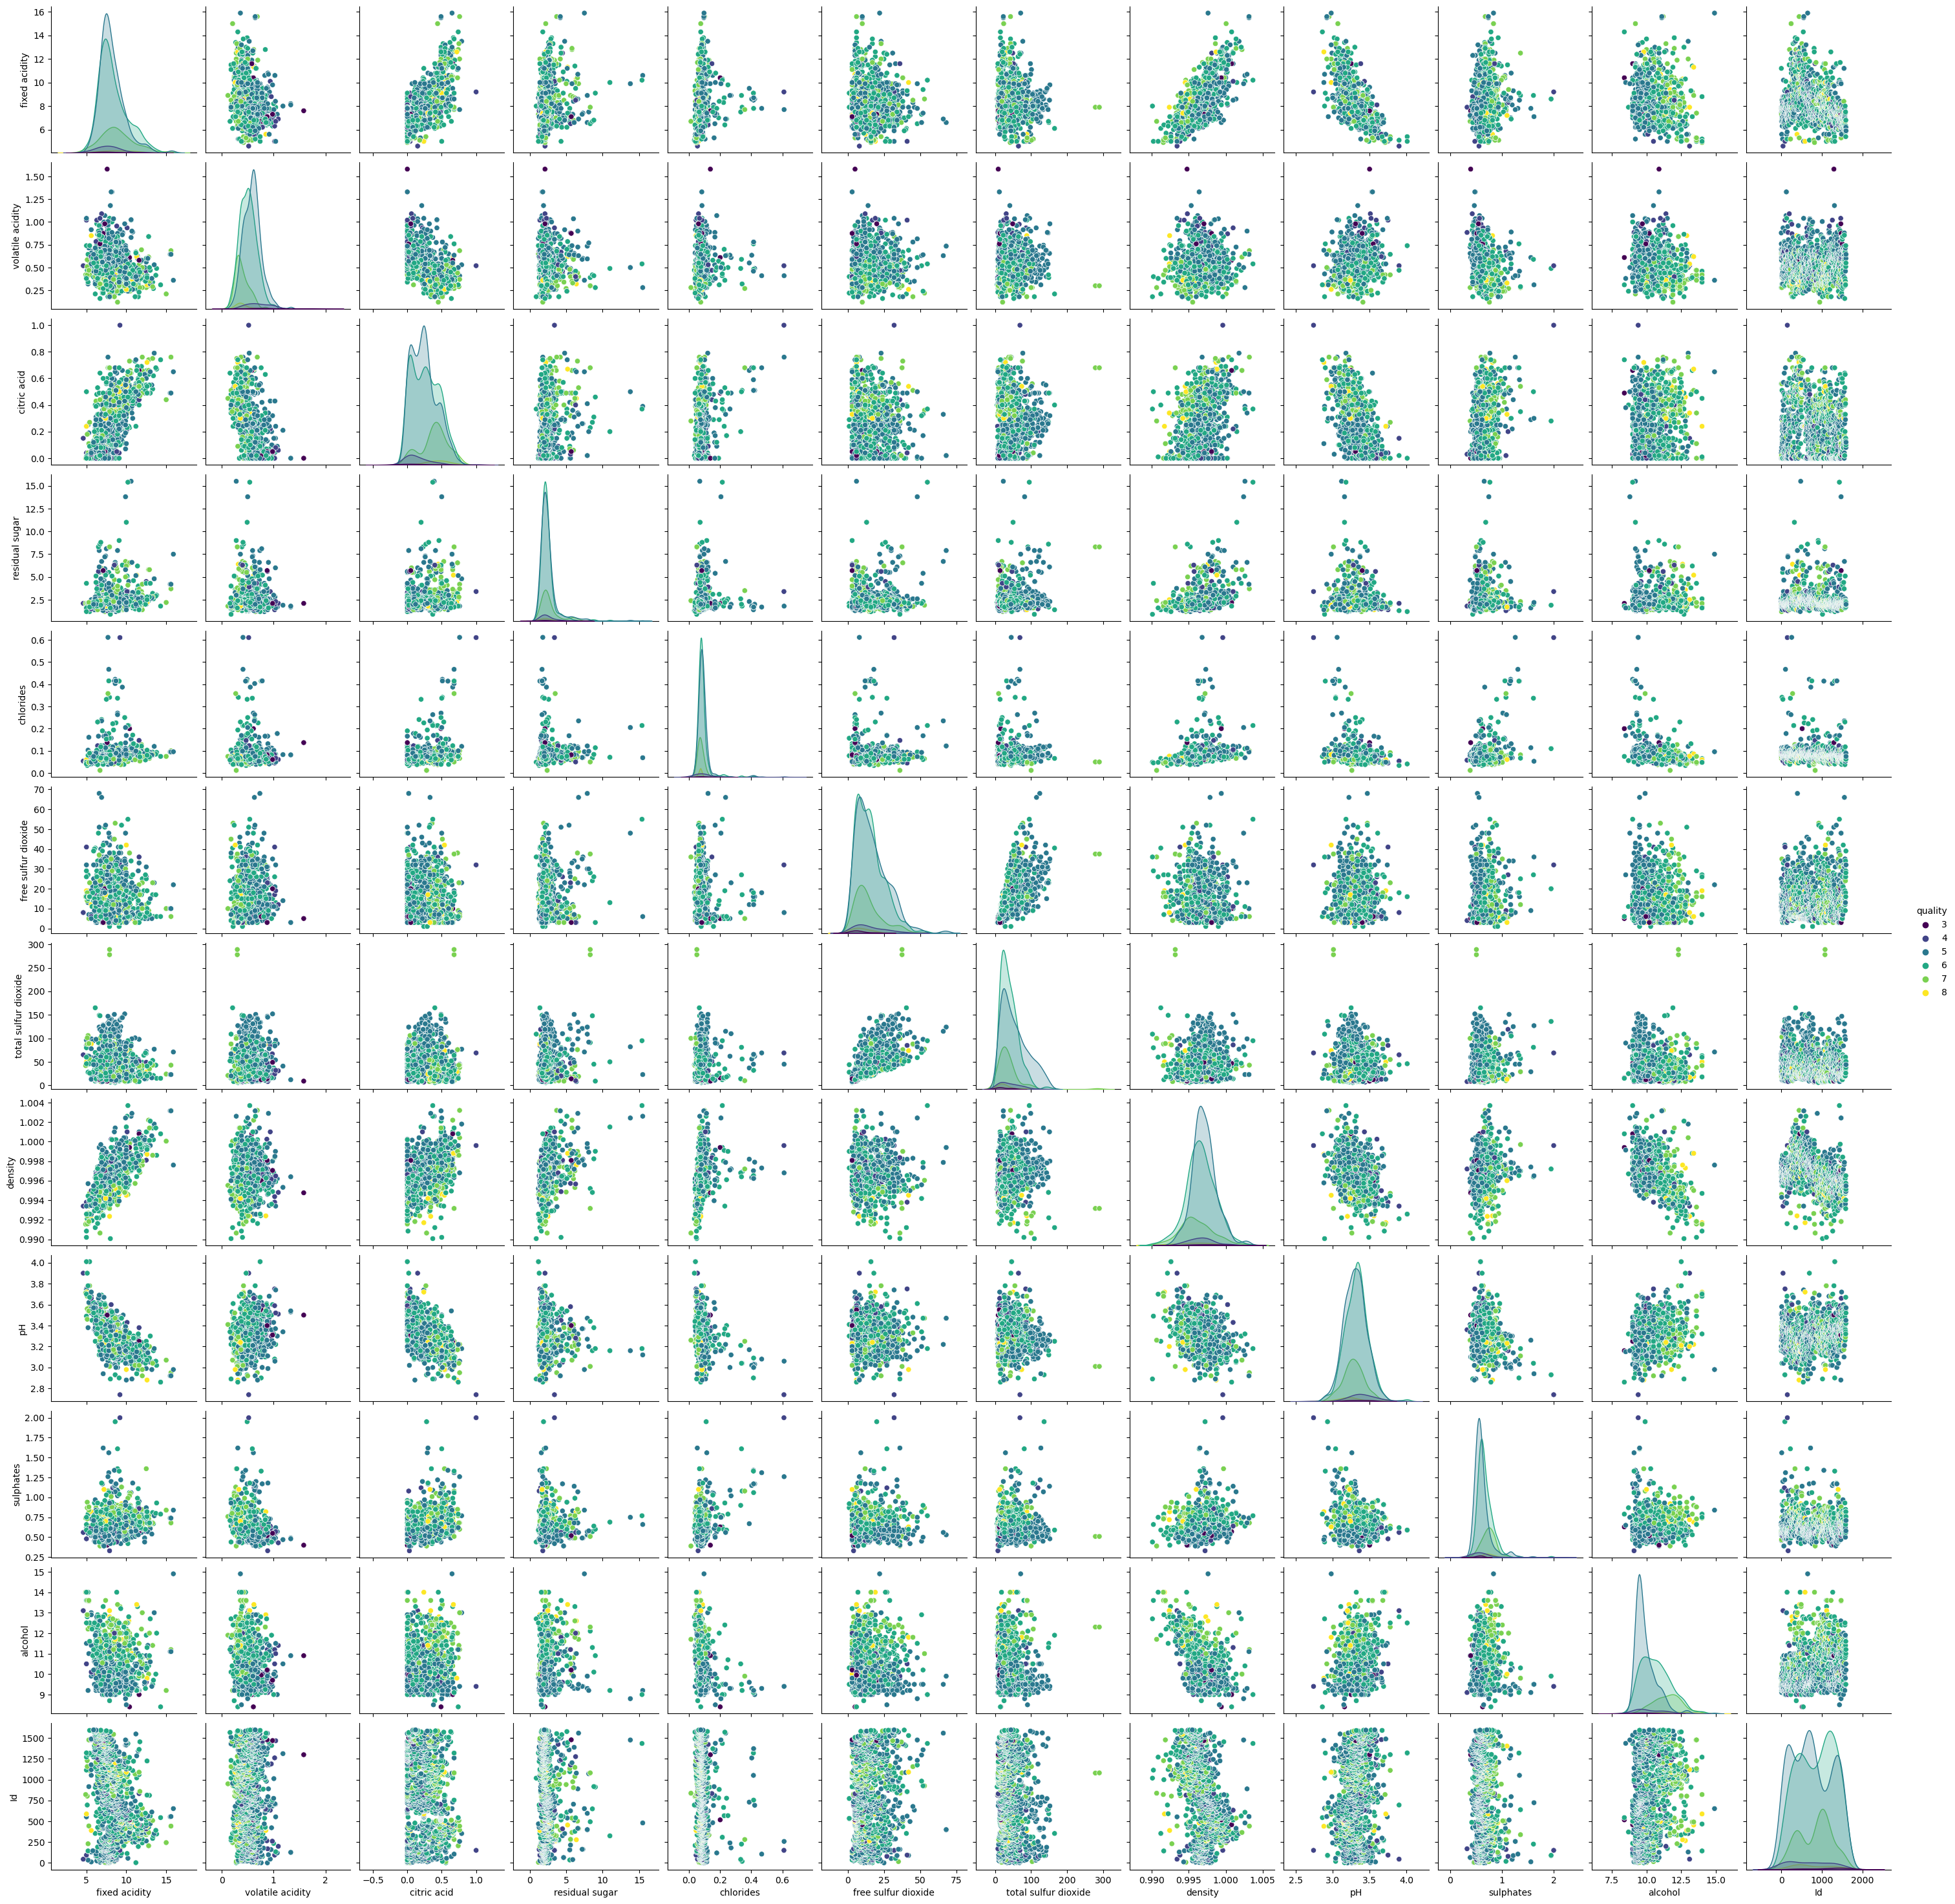

In [29]:
sns.pairplot(wine_data, hue='quality', palette='viridis', height=2.5)
plt.show()


## Hyperparameter Tuning using GridSearchCV for Random Forest

In [31]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("\nBest Parameters for Random Forest:", grid_search_rf.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Hyperparameter Tuning using GridSearchCV for SGD

In [33]:
param_grid_sgd = {
    'loss': ['hinge', 'log', 'squared_hinge'],
    'penalty': ['l2', 'l1'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 1500, 2000]
}

grid_search_sgd = GridSearchCV(estimator=sgd_model, param_grid=param_grid_sgd, cv=3, verbose=2, n_jobs=-1)
grid_search_sgd.fit(X_train_scaled, y_train)
print("\nBest Parameters for SGD:", grid_search_sgd.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits

Best Parameters for SGD: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}


C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\User

## Hyperparameter Tuning using GridSearchCV for SVC

In [35]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=param_grid_svc, cv=3, verbose=2, n_jobs=-1)
grid_search_svc.fit(X_train_scaled, y_train)
print("\nBest Parameters for SVC:", grid_search_svc.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [37]:
print("\nEvaluating Tuned Random Forest Model:")
best_rf = grid_search_rf.best_estimator_
rf_tuned_pred = best_rf.predict(X_test)
print(classification_report(y_test, rf_tuned_pred))
print(confusion_matrix(y_test, rf_tuned_pred))

print("\nEvaluating Tuned SGD Model:")
best_sgd = grid_search_sgd.best_estimator_
sgd_tuned_pred = best_sgd.predict(X_test_scaled)
print(classification_report(y_test, sgd_tuned_pred))
print(confusion_matrix(y_test, sgd_tuned_pred))

print("\nEvaluating Tuned SVC Model:")
best_svc = grid_search_svc.best_estimator_
svc_tuned_pred = best_svc.predict(X_test_scaled)
print(classification_report(y_test, svc_tuned_pred))
print(confusion_matrix(y_test, svc_tuned_pred))



Evaluating Tuned Random Forest Model:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.76      0.74        96
           6       0.65      0.69      0.67        99
           7       0.70      0.62      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.41      0.41       229
weighted avg       0.66      0.69      0.67       229

[[ 0  3  3  0  0]
 [ 0 73 22  1  0]
 [ 0 25 68  6  0]
 [ 0  0 10 16  0]
 [ 0  0  2  0  0]]

Evaluating Tuned SGD Model:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.84      0.74        96
           6       0.57      0.51      0.54        99
           7       0.17      0.08      0.11        26
           8       0.00      0.00      0.00         2

    accuracy              

C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Moha

In [39]:
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-Validation Scores for Random Forest: ", cv_scores_rf)
print("Average Cross-Validation Score for Random Forest: ", cv_scores_rf.mean())

cv_scores_sgd = cross_val_score(sgd_model, X, y, cv=5)
print("\nCross-Validation Scores for SGD: ", cv_scores_sgd)
print("Average Cross-Validation Score for SGD: ", cv_scores_sgd.mean())

cv_scores_svc = cross_val_score(svc_model, X, y, cv=5)
print("\nCross-Validation Scores for SVC: ", cv_scores_svc)
print("Average Cross-Validation Score for SVC: ", cv_scores_svc.mean())



Cross-Validation Scores for Random Forest:  [0.44104803 0.54585153 0.59825328 0.56578947 0.53508772]
Average Cross-Validation Score for Random Forest:  0.5372060062820807

Cross-Validation Scores for SGD:  [0.41048035 0.41921397 0.42358079 0.42105263 0.03070175]
Average Cross-Validation Score for SGD:  0.3410058990270436

Cross-Validation Scores for SVC:  [0.42358079 0.42358079 0.40174672 0.40789474 0.43421053]
Average Cross-Validation Score for SVC:  0.41820271202022524


## confusion matrix

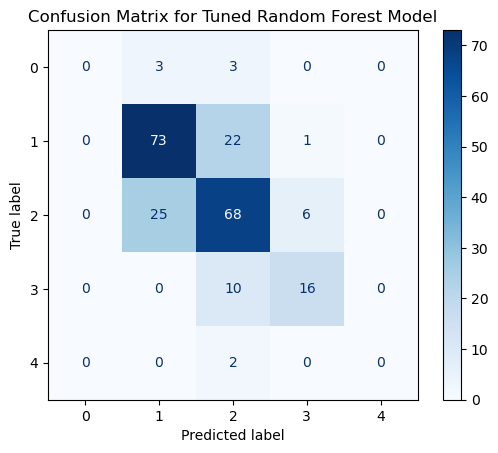

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rf_tuned_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Random Forest Model')
plt.show()
